# Installation

In [0]:
!git clone https://github.com/johnhallman/tigercontrol.git

In [0]:
!pip install --quiet -e tigercontrol

In [0]:
import tigercontrol
from tigercontrol.models.optimizers.ogd import OGD
from tigercontrol.experiments.experiment import Experiment
import jax.numpy as np
import matplotlib.pyplot as plt

# Basic Experiment

1. Create an experiment instance.

In [0]:
exp = Experiment()

2. Call help() for a description of available modules, their default initializations and how to use them.

In [3]:
exp.help()



-------------------- *** --------------------

Description: Streamlines the process of performing experiments and comparing results of models across
             a range of problems.

Methods:

    initialize(problems = None, models = None, problem_to_models = None, metrics = ['mse'],
               use_precomputed = True, timesteps = 100, verbose = True, load_bar = True):

        Description: Initializes the experiment instance. 

        Args:
            problems (dict/list): map of the form problem_id -> hyperparameters for problem or list of problem ids;
                                  in the latter case, default parameters will be used for initialization

            models (dict/list): map of the form model_id -> hyperparameters for model or list of model ids;
                                in the latter case, default parameters will be used for initialization

            problem_to_models (dict) : map of the form problem_id -> list of model_id.
                          

3. Initialize a simple experiment instance.

In [0]:
exp.initialize(problems = ['ARMA-v0'], models =  ['PredictZero', 'LastValue'],
               metrics = ['mse'], use_precomputed = False, timesteps = 100, verbose = False, load_bar = False)

4. Now that we have all results stored internally, we can show a graph of the performance of the various models on the specified problem.

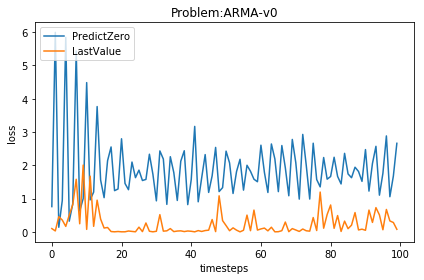

In [6]:
exp.graph()

5. Alternatively, we could show a scoreboard that contains the average loss of each model.

In [7]:
exp.scoreboard()

Scoreboard for average mse:
+-----------------+-------------+-----------+
| Problems\Models | PredictZero | LastValue |
+-----------------+-------------+-----------+
|     ARMA-v0     |  1.8823036  | 0.2429869 |
+-----------------+-------------+-----------+


6. Suppose we are interested in how a new model compares to these two 'basic' models. Then, we have to provide the id of the model and the parameters we want to initialize it with and then add it to the current experiment instance and then look at the updated graph and scoreboard.

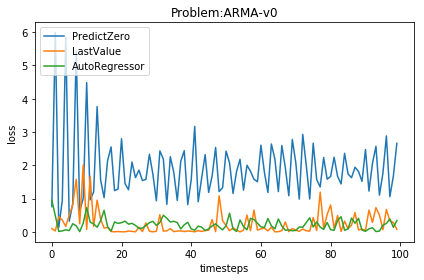

Scoreboard for average mse:
+-----------------+-------------+-----------+---------------+
| Problems\Models | PredictZero | LastValue | AutoRegressor |
+-----------------+-------------+-----------+---------------+
|     ARMA-v0     |  1.8823036  | 0.2429869 |   0.21497957  |
+-----------------+-------------+-----------+---------------+


In [9]:
exp.add_model("AutoRegressor", None)
exp.graph()
exp.scoreboard()

# Running Bigger Experiments

1. If we want out problems/models to be initilized with specific hyperparameters, we can do so by providing dictionaries at initialization.

In [16]:
exp = Experiment()
exp.initialize(problems = {'ARMA-v0': {'p' : 4, 'q' : 0}, 'ENSO-v0': {'history' : 12, 'timeline': 6}},
               models =  {'LastValue' : None, 'AutoRegressor' : {'optimizer': OGD}}, metrics = ['mse'], use_precomputed = False,
               timesteps = 100, verbose = False, load_bar = False)

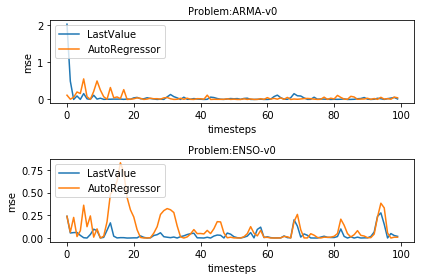

Average mse:
+-----------------+-------------+---------------+
| Problems\Models |  LastValue  | AutoRegressor |
+-----------------+-------------+---------------+
|     ARMA-v0     | 0.050436035 |  0.045578957  |
|     ENSO-v0     |  0.03390405 |   0.11462717  |
+-----------------+-------------+---------------+


In [17]:
exp.graph()
exp.scoreboard()